# Spam detection in emails

Import of all necessary libraries.

In [20]:
import re
import string
import email
import json
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import random
import numpy as np
import pandas as pd
from math import log, sqrt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, precision_score,recall_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

## Email preprocessing
In order to pre-process emails, it is necessary to define several functions. Here you can find functions for removing hyperlinks, numbers, newline characters and tabs. We also remove punctuation, redundant whitespaces and convert all characters to lowercase. The tokenization is performed in the e-mail processed in this way, the stop words and words shorter than 2 (including) are removed and finally the stematization takes place. We've included all of these steps in a pipeline called clean_up_pipeline().

In [7]:
def process_email(message):
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    sw = stopwords.words('english')
    words = [word for word in words if word not in sw]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]   
    return words

def remove_hyperlink(word):
    result = re.sub(r"http\S+", "", word)
    return result

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word
    for znak in string.punctuation:
        if znak in word:
            result = result.replace(znak, ' ')
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n',' ')

def replace_tab(word):
    return word.replace('\t',' ')

def clean_up_pipeline(sentence):
    cleaning_utils = [replace_newline,
                      replace_tab,
                      to_lower,
                      remove_number,
                      remove_hyperlink,
                      remove_punctuation,
                      remove_whitespace,
                      process_email]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

def tokenize(message):
    words = word_tokenize(message)
    return words

def to_words(sentence):
    cleaning_utils = [replace_newline,
                      replace_tab,
                      to_lower,
                      remove_punctuation,
                      remove_whitespace,
                      tokenize]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

## Opening files in folders and Parsing selected attributes
In the next part of the code, we first use regex to select the name of the file in which the email is located and also the label that determines whether the email is spam. Using this data, we will create a path to the location of the email. We use the html parser to select the body of the email. In the second iteration, we read the email line by line and parse the following attributes: Sender, Receiver, Date, and Subject. Emails parsed in this way are stored in a json file, where one line represents one email. We also create 2 files, where we store spam in one of them and ham in the other.

In [78]:
folders = ['C:/Users/admin/Desktop/ING_1.ročník/ZS_2020-2021/VINF/trec05p', 'C:/Users/admin/Desktop/ING_1.ročník/ZS_2020-2021/VINF/trec06p', 'C:/Users/admin/Desktop/ING_1.ročník/ZS_2020-2021/VINF/trec07p/trec07p']

id = 0

for folder in folders:
    with open(folder + '/full/index', 'r') as ifile:
        raw_labels = ifile.readlines()

    for label in raw_labels:
        mail = {}
        if 'trec07p' in folder:
            match_0 = re.search(r'((?:sp|h)am) ../data/inmail.(\d{1,})', label)
            if match_0:
                class_ = match_0.group(1)
                email_num = match_0.group(2)
                mail['Email_number'] = id
                mail['Class'] = class_
        else:
            match_0 = re.search(r'((?:sp|h)am) ../data/(\d{1,})/(\d{1,})', label)
            if match_0:
                class_ = match_0.group(1)
                email_num = match_0.group(3)
                folder_num = match_0.group(2)
                mail['Email_number'] = id
                mail['Class'] = class_
        id += 1

        if 'trec07p' in folder:
            path = folder + '/data/inmail.' + email_num
        else:
            path = folder + '/data/' + folder_num + '/' + email_num

        with open(path, 'rb') as email_file:
            message = email.message_from_binary_file(email_file)
            body = ''
            
            if message.is_multipart():
                for part in message.walk():
                    content_type = part.get_content_type()
                    content_disposition = str(part.get('Content-Disposition'))
                    
                    if (content_type in ['text/html', 'text/txt'] and 'attachment' not in content_disposition):
                        body = part.get_payload(decode=True)
                        break
            else:
                body = message.get_payload(decode=True)
                
            mail['Body'] = BeautifulSoup(body, 'html.parser').get_text(strip=True)

        with open(path, 'r', encoding='ISO-8859-1') as email_file:
            for line in email_file.readlines():
                match_1 = re.search(r'^From: (.*)$', line)
                if match_1:
                    mail['Sender'] = match_1.group(1)
                match_2 = re.search(r'^To: (.*)$', line)
                if match_2:
                    mail['Receiver'] = match_2.group(1)
                match_3 = re.search(r'^Date: (.*)$', line)
                if match_3:
                    mail['Date'] = match_3.group(1)
                match_4 = re.search(r'^Subject: (.*)$', line)
                if match_4:
                    mail['Subject'] = match_4.group(1)
        
        with open("data_proccessed.json", 'a+') as file:
            json.dump(mail, file)
            file.write('\n')

        if mail['Class'] == 'spam':
            with open("spams.json", 'a+') as file:
                json.dump(mail, file)
                file.write('\n')
        else:
            with open("hams.json", 'a+') as file:
                json.dump(mail, file)
                file.write('\n')

RACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACE

## Dividing emails into training and test set
Part of the code below takes care of dividing the emails into a training set and a test set. In order to maintain the original distribution, we will select 70% random spam emails for the test set and the remaining 30% for the training set. We will also divide the ham emails in the same proportion and add the corresponding parts to the already created training and test set so that both contain the same share of spam and ham.

In [86]:
train = []
test = []
spam = []
ham = []

with open('hams.json') as f:
    for line in f:
        ham.append(json.loads(line)['Email_number'])

train = random.sample(ham, int(count_ham*0.7))
test = np.setdiff1d(ham,train)

with open('hams.json') as f:
    for line in f:
        helper = json.loads(line)
        if helper['Email_number'] in train:
            with open("train.json", 'a+') as file:
                json.dump(helper, file)
                file.write('\n')
        else:
            with open("test.json", 'a+') as file:
                json.dump(helper, file)
                file.write('\n')

train = []
test = []

with open('spams.json') as f:
    for line in f:
        spam.append(json.loads(line)['Email_number'])

train = random.sample(spam, int(count_spam*0.7))
test = np.setdiff1d(spam,train)

with open('spams.json') as f:
    for line in f:
        helper = json.loads(line)
        if helper['Email_number'] in train:
            with open("train.json", 'a+') as file:
                json.dump(helper, file)
                file.write('\n')
        else:
            with open("test.json", 'a+') as file:
                json.dump(helper, file)
                file.write('\n')

## Spam classifier
The following class implements two prediction methods. The first is Bag of Words and the second is TF-IDF. The Term Frequency and Inverse Document Frequency values are calculated within the training. Then, for each word, determine the probabilities of whether it is part of spam or ham. The specific calculation depends on the chosen method (in the case of BoW it is the proportion of TF and the number of all words, in the second case we count the TF-IDF component according to a generally known formula). After such training of the model, it is possible to classify emails. The classification is done by counting the individual probabilities for each word in the email which is the subject of the prediction.

In [8]:
class SpamClassifier(object):
    def __init__(self, train_data_path, method = 'tf-idf'):
        self.mails = train_data_path
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) / (self.spam_words)
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) / (self.ham_words)

    def calc_TF_and_IDF(self):
        self.spam_mails_count = 0
        self.ham_mails_count = 0
        self.total_mails = sum(1 for line in open(self.mails))
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        with open(self.mails) as f:
            for line in f:
                mail = json.loads(line)
                if mail['Class'] == 'spam':
                    self.spam_mails_count += 1
                else:
                    self.ham_mails_count += 1

                message_processed = clean_up_pipeline(mail['Body'])
                count = list()

                for word in message_processed:
                    if mail['Class'] == 'spam':
                        self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                        self.spam_words += 1
                    else:
                        self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                        self.ham_words += 1
                    if word not in count:
                        count += [word]
                for word in count:
                    if mail['Class'] == 'spam':
                        self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                    else:
                        self.idf_ham[word] = self.idf_ham.get(word, 0) + 1 

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails_count + self.ham_mails_count) / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word]) / (self.sum_tf_idf_spam)
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails_count + self.ham_mails_count) / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word]) / (self.sum_tf_idf_ham)
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])

            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])

        return pSpam >= pHam
    
    def predict(self, test_data_path):
        true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0

        with open(test_data_path) as f:
            for line in f:
                mail = json.loads(line)
                message_processed = clean_up_pipeline(mail['Body'])
                result = int(self.classify(message_processed))

                true_pos += int(mail['Class'] == 'spam' and result == 1)
                true_neg += int(mail['Class'] == 'ham' and result == 0)
                false_pos += int(mail['Class'] == 'ham' and result == 1)
                false_neg += int(mail['Class'] == 'spam' and result == 0)

        self.precision = true_pos / (true_pos + false_pos)
        self.recall = true_pos / (true_pos + false_neg)
        self.Fscore = 2 * self.precision * self.recall / (self.precision + self.recall)
        self.accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

Bag of Words classifier

In [9]:
sc_bow = SpamClassifier('train.json', 'bow')
sc_bow.train()
sc_bow.predict('test.json')

TF-IDF classifier

In [10]:
sc_tf_idf = SpamClassifier('train.json', 'tf-idf')
sc_tf_idf.train()
sc_tf_idf.predict('test.json')

In [17]:
print("Achieved results of metrics of manually implemented methods:\n")
print("Model -> Bag of Words")
print("Accuracy:  {:.2f}%".format(100 * sc_bow.accuracy))
print("Precision: {:.2f}%".format(100 * sc_bow.precision))
print("Recall: {:.2f}%".format(100 * sc_bow.recall))
print("F-Score:  {:.2f}%\n".format(100 * sc_bow.Fscore))

print("Model -> TF-IDF")
print("Accuracy:  {:.2f}%".format(100 * sc_tf_idf.accuracy))
print("Precision: {:.2f}%".format(100 * sc_tf_idf.precision))
print("Recall: {:.2f}%".format(100 * sc_tf_idf.recall))
print("F-Score:  {:.2f}%".format(100 * sc_tf_idf.Fscore))

Achieved results of metrics of manually implemented methods:

Model -> Bag of Words
Accuracy:  45.51%
Precision: 59.90%
Recall: 37.75%
F-Score:  46.31%

Model -> TF-IDF
Accuracy:  46.43%
Precision: 61.53%
Recall: 37.23%
F-Score:  46.39%


## Usage of Naive Bayes classifier from sklearn library

Preparation of data in the form required for the use of classifiers from available libraries.

In [12]:
train_data = pd.read_json('train.json', lines=True)
train_data.drop(['Date', 'Receiver', 'Subject', 'Sender', 'Email_number'], axis = 1, inplace = True)
train_data['Class'] = train_data['Class'].map({'ham': 0, 'spam': 1})
train_data.reset_index(inplace = True)
train_data.drop(['index'], axis = 1, inplace = True)

test_data = pd.read_json('test.json', lines=True)
test_data.drop(['Date', 'Receiver', 'Subject', 'Sender', 'Email_number'], axis = 1, inplace = True)
test_data['Class'] = test_data['Class'].map({'ham': 0, 'spam': 1})
test_data.reset_index(inplace = True)
test_data.drop(['index'], axis = 1, inplace = True)

x_train = train_data['Body']
y_train = train_data['Class']
x_test = test_data['Body']
y_test = test_data['Class']

Naive Bayes classifier with CountVectorizer

In [13]:
cv = CountVectorizer(analyzer=clean_up_pipeline)
x_cv_train = cv.fit_transform(x_train)
x_cv_test = cv.transform(x_test)

classifier1 = MultinomialNB().fit(x_cv_train, y_train)
pred_cv = classifier1.predict(x_cv_test)

Naive Bayes classifier with TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer(analyzer=clean_up_pipeline)
x_ftidf_train = vectorizer.fit_transform(x_train)
x_ftidf_test = vectorizer.transform(x_test)

classifier2 = MultinomialNB().fit(x_ftidf_train, y_train)
pred_ftidf = classifier2.predict(x_ftidf_test)

In [16]:
print("Achieved results of metrics of adopted methods:\n")
print("Model -> Naive Bayes classifier with CountVectorizer")
print("Accuracy:  {:.2f}%".format(100 * accuracy_score(y_test, pred_cv)))
print("Precision: {:.2f}%".format(100 * precision_score(y_test, pred_cv)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, pred_cv)))
print("F-Score:  {:.2f}%\n".format(100 * f1_score(y_test, pred_cv)))

print("Model -> Naive Bayes classifier with TfidfVectorizer")
print("Accuracy:  {:.2f}%".format(100 * accuracy_score(y_test, pred_ftidf)))
print("Precision: {:.2f}%".format(100 * precision_score(y_test, pred_ftidf)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, pred_ftidf)))
print("F-Score:  {:.2f}%".format(100 * f1_score(y_test, pred_ftidf)))

Achieved results of metrics of adopted methods:

Model -> Naive Bayes classifier with CountVectorizer
Accuracy:  92.58%
Precision: 94.26%
Recall: 93.79%
F-Score:  94.03%

Model -> Naive Bayes classifier with TfidfVectorizer
Accuracy:  94.17%
Precision: 93.64%
Recall: 97.23%
F-Score:  95.40%


## Interesting statistics

In [155]:
from statistics import mean 
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud
from PIL import Image
from operator import itemgetter 
from IPython.display import display_html

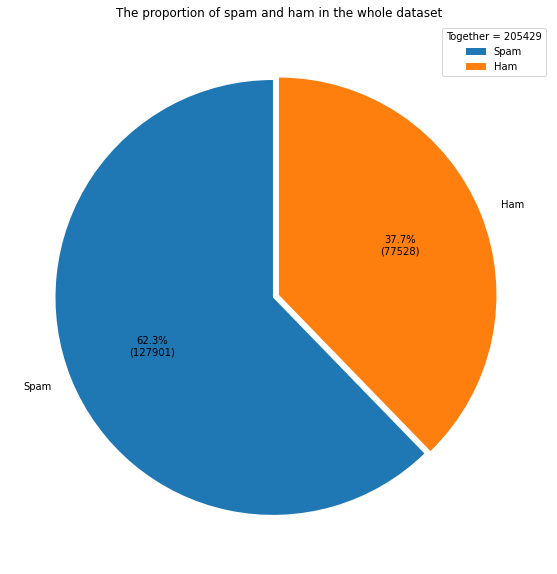

In [21]:
all_data = pd.read_json('data_proccessed.json', lines=True)
all_data.drop(['Date', 'Receiver', 'Subject', 'Sender', 'Email_number'], axis = 1, inplace = True)
all_data['Class'] = all_data['Class'].map({'ham': 0, 'spam': 1})
all_data.reset_index(inplace = True)
all_data.drop(['index'], axis = 1, inplace = True)

labels = 'Spam', 'Ham'
sizes_1 = [len(all_data[all_data['Class'] == 1]), len(all_data[all_data['Class'] == 0])]
explode = (0.03, 0)

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

fig, ax = plt.subplots(figsize =(10, 10)) 
ax.pie(sizes_1, autopct = lambda pct: func(pct, sizes_1), explode = explode, labels = labels, startangle = 90) 
ax.set_title("The proportion of spam and ham in the whole dataset") 
ax.legend(title='Together = ' + str(len(all_data)))
plt.show()

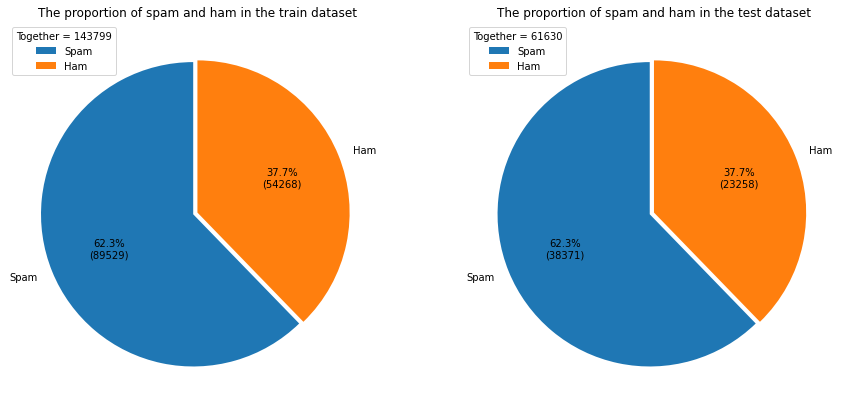

In [22]:
sizes_2 = [len(train_data[train_data['Class'] == 1]), len(train_data[train_data['Class'] == 0])]
fig,(ax1, ax2) = plt.subplots(1, 2, figsize =(15, 15)) 
ax1.pie(sizes_2, autopct = lambda pct: func(pct, sizes_2), explode = explode, labels = labels, startangle = 90) 
ax1.set_title("The proportion of spam and ham in the train dataset") 
ax1.legend(title='Together = ' + str(len(train_data)))

sizes_3 = [len(test_data[test_data['Class'] == 1]), len(test_data[test_data['Class'] == 0])]
ax2.pie(sizes_3, autopct = lambda pct: func(pct, sizes_3), explode = explode, labels = labels, startangle = 90) 
ax2.set_title("The proportion of spam and ham in the test dataset") 
ax2.legend(title='Together = ' + str(len(test_data)))

plt.show() 

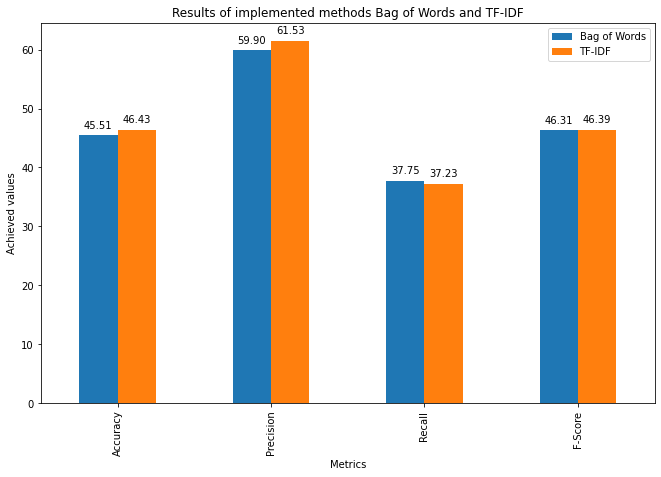

In [28]:
data_1 = [['Bag of Words', 45.51, 59.90, 37.75, 46.31], ['TF-IDF', 46.43, 61.53, 37.23, 46.39]] 
df_1 = pd.DataFrame(data_1, columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F-Score'])
df_1 = df_1.set_index('Method')
ax = df_1.transpose().plot(kind='bar', figsize=(11,7))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Metrics')
plt.ylabel('Achieved values')
plt.title("Results of implemented methods Bag of Words and TF-IDF")
plt.legend(loc = 'upper right')

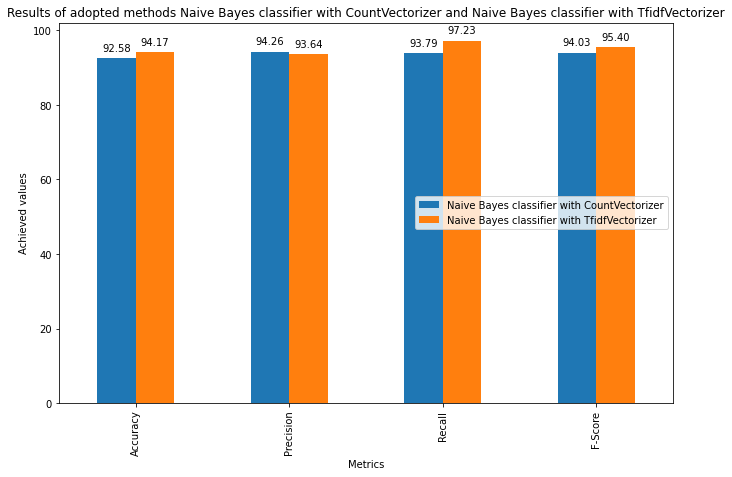

In [29]:
data_2 = [['Naive Bayes classifier with CountVectorizer', 92.58, 94.26, 93.79, 94.03], ['Naive Bayes classifier with TfidfVectorizer', 94.17, 93.64, 97.23, 95.40]] 
df_2 = pd.DataFrame(data_2, columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F-Score'])
df_2 = df_2.set_index('Method')
ax = df_2.transpose().plot(kind='bar', figsize=(11,7))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Metrics')
plt.ylabel('Achieved values')
plt.title("Results of adopted methods Naive Bayes classifier with CountVectorizer and Naive Bayes classifier with TfidfVectorizer")
plt.legend(loc = 'center right')

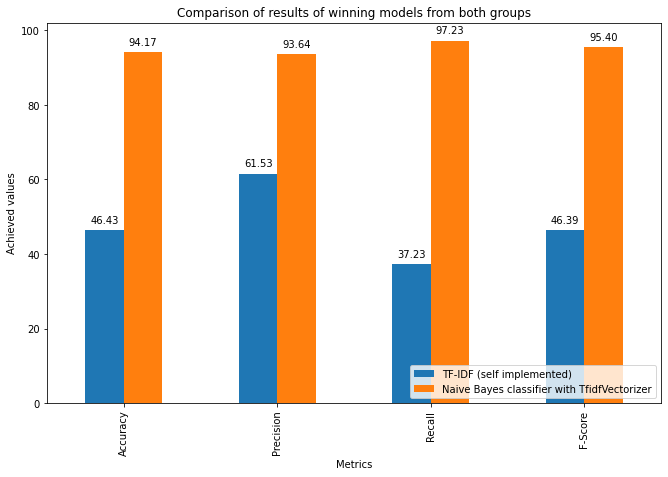

In [30]:
data_3 = [['TF-IDF (self implemented)', 46.43, 61.53, 37.23, 46.39], ['Naive Bayes classifier with TfidfVectorizer', 94.17, 93.64, 97.23, 95.40]] 
df_3 = pd.DataFrame(data_3, columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F-Score'])
df_3 = df_3.set_index('Method')
ax = df_3.transpose().plot(kind='bar', figsize=(11,7))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Metrics')
plt.ylabel('Achieved values')
plt.title("Comparison of results of winning models from both groups")
plt.legend(loc = 'lower right')

In [31]:
spam_data = pd.read_json('spams.json', lines=True)
spam_data.drop(['Date', 'Receiver', 'Subject', 'Sender', 'Email_number'], axis = 1, inplace = True)
spam_data['Class'] = all_data['Class'].map({'ham': 0, 'spam': 1})
spam_data.reset_index(inplace = True)
spam_data.drop(['index'], axis = 1, inplace = True)

spam_data['Original_length'] = 0
spam_data['Preprocessed_length'] = 0

for index, row in spam_data.iterrows():
    spam_data['Original_length'][index] = len(to_words(row['Body']))
    spam_data['Preprocessed_length'][index] = len(clean_up_pipeline(row['Body']))

In [86]:
below_100_spam_orig = spam_data[spam_data['Original_length'] <= 100]
below_1000_spam_orig = spam_data[spam_data['Original_length'] <= 1000]

below_100_spam_prep = spam_data[spam_data['Preprocessed_length'] <= 100]
below_1000_spam_prep = spam_data[spam_data['Preprocessed_length'] <= 1000]

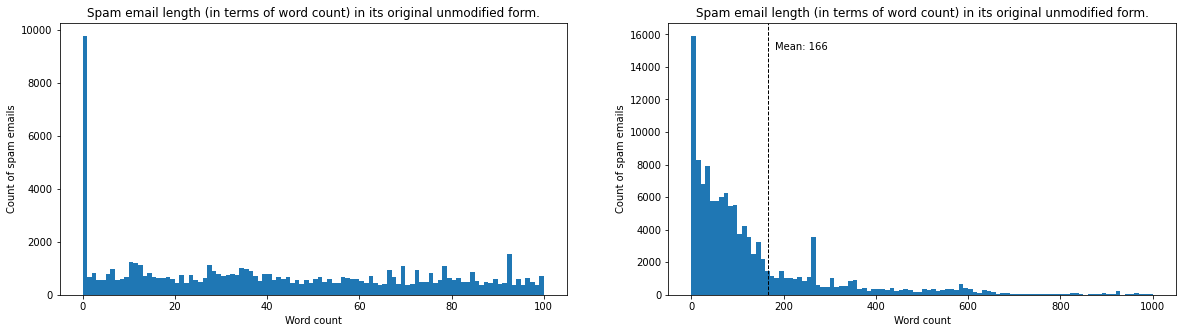


From all 127901 spams, 2826 contain more than 1000 words (in its original unmodified form).
9735 of spam emails are empty.


In [118]:
fig, ax = plt.subplots(1,2, figsize =(20, 5))
ax[0].hist(below_100_spam_orig['Original_length'], bins=100)
ax[1].hist(below_1000_spam_orig['Original_length'], bins=100)
ax[1].axvline(mean(spam_data['Original_length']), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax[1].text(mean(spam_data['Original_length'])*1.1, max_ylim*0.9, 'Mean: {:.0f}'.format(mean(spam_data['Original_length'])))
for i in (ax[0], ax[1]):
    getattr(i, 'set_xlabel')('Word count')
    getattr(i, 'set_ylabel')('Count of spam emails')
    getattr(i, 'set_title')('Spam email length (in terms of word count) in its original unmodified form.')
plt.show()
print('\nFrom all {} spams, {} contain more than 1000 words (in its original unmodified form).'.format(len(spam_data), len(spam_data[spam_data['Original_length'] > 1000])))
print('{} of spam emails are empty.'.format(len(spam_data[spam_data['Body'] == ''])))

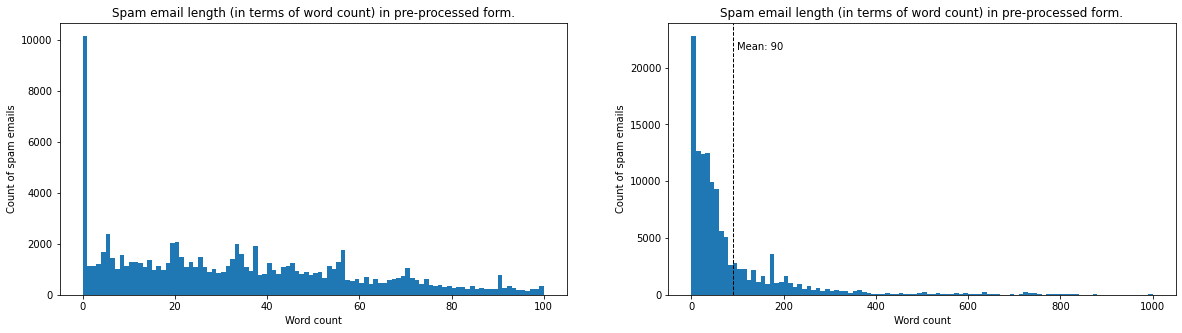


From all 127901 spams, 373 contain more than 1000 words (in pre-processed form).


In [119]:
fig, ax = plt.subplots(1,2, figsize =(20, 5))
ax[0].hist(below_100_spam_prep['Preprocessed_length'], bins=100)
ax[1].hist(below_1000_spam_prep['Preprocessed_length'], bins=100)
ax[1].axvline(mean(spam_data['Preprocessed_length']), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax[1].text(mean(spam_data['Preprocessed_length'])*1.1, max_ylim*0.9, 'Mean: {:.0f}'.format(mean(spam_data['Preprocessed_length'])))
for i in (ax[0], ax[1]):
    getattr(i, 'set_xlabel')('Word count')
    getattr(i, 'set_ylabel')('Count of spam emails')
    getattr(i, 'set_title')('Spam email length (in terms of word count) in pre-processed form.')
plt.show()
print('\nFrom all {} spams, {} contain more than 1000 words (in pre-processed form).'.format(len(spam_data), len(spam_data[spam_data['Preprocessed_length'] > 1000])))

In [102]:
ham_data = pd.read_json('hams.json', lines=True)
ham_data.drop(['Date', 'Receiver', 'Subject', 'Sender', 'Email_number'], axis = 1, inplace = True)
ham_data['Class'] = all_data['Class'].map({'ham': 0, 'spam': 1})
ham_data.reset_index(inplace = True)
ham_data.drop(['index'], axis = 1, inplace = True)

ham_data['Original_length'] = 0
ham_data['Preprocessed_length'] = 0

for index, row in ham_data.iterrows():
    ham_data['Original_length'][index] = len(to_words(row['Body']))
    ham_data['Preprocessed_length'][index] = len(clean_up_pipeline(row['Body']))

In [113]:
below_100_ham_orig = ham_data[ham_data['Original_length'] <= 100]
below_1000_ham_orig = ham_data[ham_data['Original_length'] <= 1000]

below_100_ham_prep = ham_data[ham_data['Preprocessed_length'] <= 100]
below_1000_ham_prep = ham_data[ham_data['Preprocessed_length'] <= 1000]

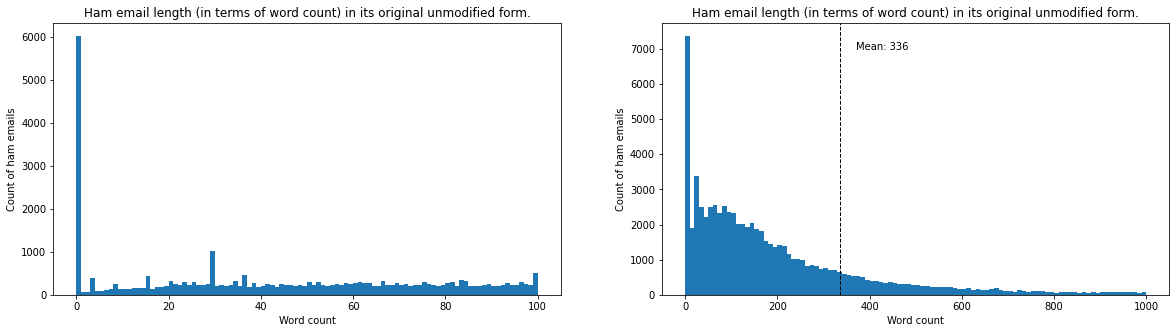


From all 77528 hams, 3716 contain more than 1000 words (in its original unmodified form).
6009 of ham emails are empty.


In [120]:
fig, ax = plt.subplots(1,2, figsize =(20, 5))
ax[0].hist(below_100_ham_orig['Original_length'], bins=100)
ax[1].hist(below_1000_ham_orig['Original_length'], bins=100)
ax[1].axvline(mean(ham_data['Original_length']), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax[1].text(mean(ham_data['Original_length'])*1.1, max_ylim*0.9, 'Mean: {:.0f}'.format(mean(ham_data['Original_length'])))
for i in (ax[0], ax[1]):
    getattr(i, 'set_xlabel')('Word count')
    getattr(i, 'set_ylabel')('Count of ham emails')
    getattr(i, 'set_title')('Ham email length (in terms of word count) in its original unmodified form.')
plt.show()
print('\nFrom all {} hams, {} contain more than 1000 words (in its original unmodified form).'.format(len(ham_data), len(ham_data[ham_data['Original_length'] > 1000])))
print('{} of ham emails are empty.'.format(len(ham_data[ham_data['Body'] == ''])))

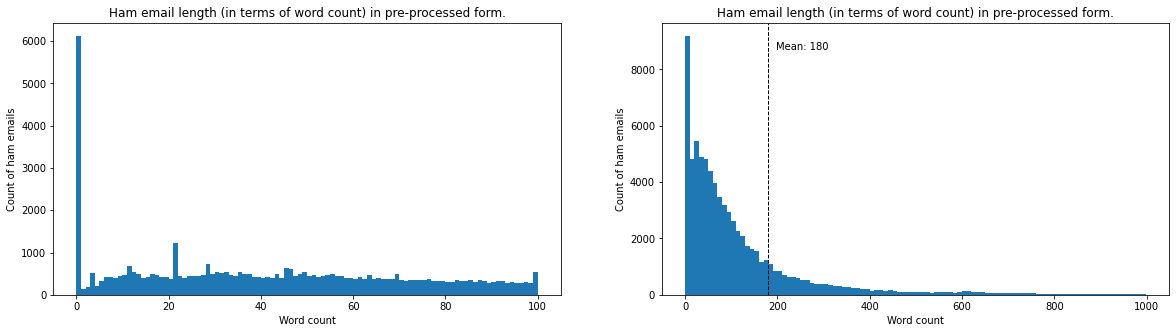


From all 77528 hams, 1575 contain more than 1000 words (in pre-processed form).


In [121]:
fig, ax = plt.subplots(1,2, figsize =(20, 5))
ax[0].hist(below_100_ham_prep['Preprocessed_length'], bins=100)
ax[1].hist(below_1000_ham_prep['Preprocessed_length'], bins=100)
ax[1].axvline(mean(ham_data['Preprocessed_length']), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax[1].text(mean(ham_data['Preprocessed_length'])*1.1, max_ylim*0.9, 'Mean: {:.0f}'.format(mean(ham_data['Preprocessed_length'])))
for i in (ax[0], ax[1]):
    getattr(i, 'set_xlabel')('Word count')
    getattr(i, 'set_ylabel')('Count of ham emails')
    getattr(i, 'set_title')('Ham email length (in terms of word count) in pre-processed form.')
plt.show()
print('\nFrom all {} hams, {} contain more than 1000 words (in pre-processed form).'.format(len(ham_data), len(ham_data[ham_data['Preprocessed_length'] > 1000])))

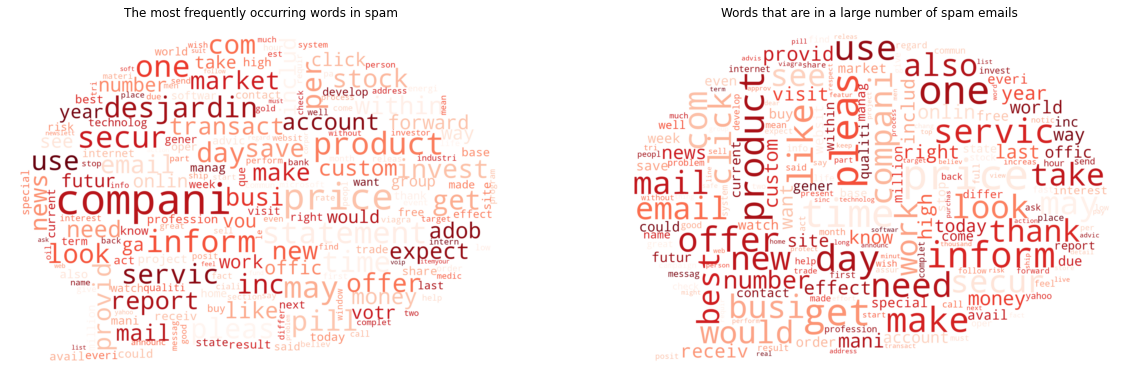

In [139]:
comment_mask = np.array(Image.open("comment.png"))
wordcloud1 = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Reds").generate_from_frequencies(sc_bow.tf_spam)
wordcloud2 = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Reds").generate_from_frequencies(sc_tf_idf.idf_spam)
f = plt.figure(figsize=[20, 10])
f.add_subplot(1,2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("The most frequently occurring words in spam")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Words that are in a large number of spam emails")
plt.show(block=True)

In [154]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

res1 = dict(sorted(sc_bow.tf_spam.items(), key = itemgetter(1), reverse = True)[:20])
df1 = pd.DataFrame.from_dict(res1, orient='index', columns=['Count'])
df1.index.names = ['Word (TF)']
res2 = dict(sorted(sc_tf_idf.idf_spam.items(), key = itemgetter(1), reverse = True)[:20])
df2 = pd.DataFrame.from_dict(res2, orient='index', columns=['Count'])
df2.index.names = ['Word (IDF)']
display_side_by_side(df1, df2)

,Count
Word (TF),
compani,55814
price,42169
product,29543
inform,28586
one,28187
may,28172
statement,28073
secur,27492
time,25122


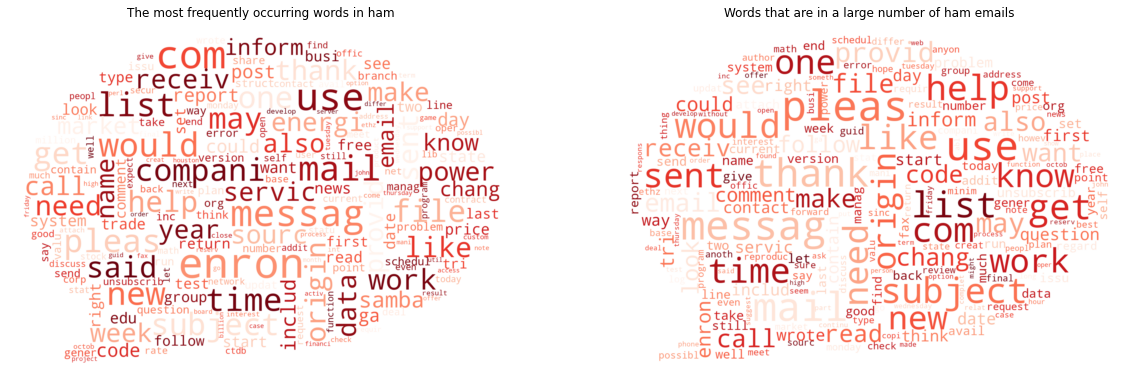

In [140]:
wordcloud3 = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Reds").generate_from_frequencies(sc_bow.tf_ham)
wordcloud4 = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Reds").generate_from_frequencies(sc_tf_idf.idf_ham)
f = plt.figure(figsize=[20, 10])
f.add_subplot(1,2, 1)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("The most frequently occurring words in ham")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Words that are in a large number of ham emails")
plt.show(block=True)

In [156]:
res1 = dict(sorted(sc_bow.tf_ham.items(), key = itemgetter(1), reverse = True)[:20])
df1 = pd.DataFrame.from_dict(res1, orient='index', columns=['Count'])
df1.index.names = ['Word (TF)']
res2 = dict(sorted(sc_tf_idf.idf_ham.items(), key = itemgetter(1), reverse = True)[:20])
df2 = pd.DataFrame.from_dict(res2, orient='index', columns=['Count'])
df2.index.names = ['Word (IDF)']
display_side_by_side(df1, df2)

,Count
Word (TF),
enron,55634
com,47982
use,45444
messag,42732
mail,37201
would,34027
list,33485
new,32725
pleas,32087


# A piece of interaction for pleasure
We have created a simple "application" that immediately determines if the entered text is spam. We provide predictions from both models.

In [162]:
message = clean_up_pipeline('Hello John, please could you send me those materials we were talking about yesterday? Thank you in advance. ;)')
print('According to Bag of Word, is this message a spam? - {}'.format(sc_bow.classify(message)))
print('According to TF-IDF, is this message a spam? - {}'.format(sc_tf_idf.classify(message)))

According to Bag of Word, is this message a spam? - False
According to TF-IDF, is this message a spam? - False


In [163]:
message = clean_up_pipeline('Dear Mr. John, do not miss this great opportunity and take advantage of unique discounts on many of our products. For more info visit our site.')
print('According to Bag of Word, is this message a spam? - {}'.format(sc_bow.classify(message)))
print('According to TF-IDF, is this message a spam? - {}'.format(sc_tf_idf.classify(message)))

According to Bag of Word, is this message a spam? - True
According to TF-IDF, is this message a spam? - True
